In [213]:
# 필요한 모듈 임포트 및 필요한 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn  # scikit-learn 모듈 임포트
from sklearn.linear_model import Ridge #Ridge 회귀 사용
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler # 특성 스케일링: Min-Mas 스케일링 , 정규화
from sklearn.preprocessing import StandardScaler # 특성 스케일링: 표준화
from sklearn.model_selection import train_test_split # 테스트 집합 분리
from sklearn.preprocessing import PolynomialFeatures


# 랜덤하게 실행되는 부분들에 대해 다음에 실행해도 동일한 결과를 얻기 위해 설정
seed = 11
rng = np.random.default_rng(seed)

In [214]:
df = pd.read_csv('6class.csv', sep=',')  # 별의 종류 데이터셋

In [215]:
df.info() # 데이터셋 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute Magnitude(Mv)  240 non-null    float64
 4   Star color              240 non-null    int64  
 5   Spectral Class          240 non-null    int64  
 6   Star type               240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


##### 각 특성 별 의미 (총 7개, 모두 수치형) 
Temperature (K)          : 온도
Luminosity(L/Lo)         : 밝기
Radius(R/Ro)             : 반지름
Absolute Magnitude(Mv)   : 절대 크기
Star color               : 색
Spectral Class           : 분광형
Star Type                : 항성 분류

In [216]:
df.describe() # 데이터셋의 특성 요약 정보

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv),Star color,Spectral Class,Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,5.566667,3.758333,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.665467,2.090007,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,5.000000,1.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,6.000000,5.000000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,7.000000,5.000000,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,9.000000,6.000000,5.000000


In [217]:
df.keys() #데이터셋의 키값 목록

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute Magnitude(Mv)', 'Star color', 'Spectral Class', 'Star type'],
      dtype='object')

In [218]:
X = df.loc[:, 'Temperature (K)':'Spectral Class'] # X에 Temperature (K)부터 Absolute magnitude(Mv)까지의 값을 넣음
X # X에 잘 들어갔는지 확인 하려 출력

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,6,5
1,3042,0.000500,0.1542,16.60,6,5
2,2600,0.000300,0.1020,18.70,6,5
3,2800,0.000200,0.1600,16.65,6,5
4,1939,0.000138,0.1030,20.06,6,5
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,7,6
236,30839,834042.000000,1194.0000,-10.63,7,6
237,8829,537493.000000,1423.0000,-10.73,5,0
238,9235,404940.000000,1112.0000,-11.23,5,0


In [219]:
y=df['Star type'] # 목표값 Y = Star type
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

In [220]:
# 정규화
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(X)

minmax_scaled

array([[2.96629095e-02, 2.73127546e-09, 8.29359490e-05, 8.76797999e-01,
        6.66666667e-01, 8.33333333e-01],
       [2.89797956e-02, 4.94455040e-10, 7.48271124e-05, 8.91807380e-01,
        6.66666667e-01, 8.33333333e-01],
       [1.73668585e-02, 2.59000259e-10, 4.80371586e-05, 9.57473421e-01,
        6.66666667e-01, 8.33333333e-01],
       ...,
       [1.81025196e-01, 6.32776483e-01, 7.30304200e-01, 3.72107567e-02,
        5.55555556e-01, 0.00000000e+00],
       [1.91692283e-01, 4.76725295e-01, 5.70693556e-01, 2.15759850e-02,
        5.55555556e-01, 0.00000000e+00],
       [9.44352487e-01, 3.47181606e-01, 9.15062503e-01, 1.28830519e-01,
        7.77777778e-01, 1.00000000e+00]])

In [221]:
#표준화
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(X)

standard_scaled

array([[-0.7793821 , -0.59862356, -0.45920992,  1.11674535,  0.26073107,
         0.59533835],
       [-0.78210961, -0.59862357, -0.45924053,  1.16241376,  0.26073107,
         0.59533835],
       [-0.82847728, -0.59862357, -0.45934168,  1.36221308,  0.26073107,
         0.59533835],
       ...,
       [-0.17502879,  2.40315735,  2.29779992, -1.43783157, -0.34095602,
        -1.80199729],
       [-0.13243767,  1.66287782,  1.69517694, -1.48540283, -0.34095602,
        -1.80199729],
       [ 2.87275403,  1.04834522,  2.99536993, -1.15906395,  0.86241816,
         1.07480548]])

In [222]:
# 전체 데이터를 훈련 데이터, 테스트 데이터으로 나눔
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, y, test_size= 0.2, random_state=1234) # 표준화된 데이터셋 중 테스트, 훈련 데이터 무작위 분리 ,random_state : 난수 시드
print('X 훈련 데이터 :')
print(X_train)

X 훈련 데이터 :
[[-0.78567635  0.96511523 -0.41109696 -0.9878074   0.26073107  0.59533835]
 [-0.76553474  0.49040881 -0.42659852 -1.10388129  0.26073107  0.59533835]
 [ 0.16811297  0.0715502   0.91409229 -1.16286966 -0.94264311 -1.32253016]
 ...
 [-0.47851675 -0.59861599 -0.45739623  0.00738346 -3.34939146 -0.84306303]
 [-0.05092707 -0.59554077 -0.44819218 -0.41571537 -0.94264311 -1.80199729]
 [-0.72630056  0.51833271 -0.28708451 -0.91549908  0.26073107  0.59533835]]


In [223]:
print('X 테스트 데이터 :')
print(X_test)

X 테스트 데이터 :
[[-0.06351558  2.71817811 -0.30452376 -1.10787727  0.86241816  1.07480548]
 [ 2.90968032  0.92507234  2.16797439 -1.30082632  0.86241816  1.07480548]
 [ 2.04589883 -0.43755847 -0.44733185 -0.81655085 -0.94264311 -1.32253016]
 [-0.69902545  0.92043697  1.83275324 -1.2922635   0.26073107  0.59533835]
 [-0.72283872 -0.59862345 -0.458803    0.54589017  0.26073107  0.59533835]
 [-0.82459583 -0.59862357 -0.45929324  1.22140213  0.26073107  0.59533835]
 [ 0.07894437 -0.5948706  -0.44601422 -0.63578004 -0.94264311 -1.80199729]
 [-0.77654969 -0.59862357 -0.45858598  0.61724707  0.26073107  0.59533835]
 [ 0.66011385 -0.59862356 -0.45951588  0.80753213  0.86241816 -1.32253016]
 [-0.80330027 -0.59862357 -0.45932618  1.19856793  0.26073107  0.59533835]
 [-0.12352081 -0.59846161 -0.45583833 -0.29935606 -0.94264311 -1.80199729]
 [ 0.72232206  1.31639798 -0.40140849 -0.99637023  0.86241816  1.07480548]
 [ 0.25329522 -0.59862357 -0.45952101  0.80372643 -0.94264311 -1.32253016]
 [-0.77077995

로지스틱 회귀

In [224]:
from sklearn.linear_model import LogisticRegression

# max_iter 늘려줘야함
log_reg = LogisticRegression(random_state=seed, solver='lbfgs', max_iter=100) # 로지스틱 회귀 모델
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=11)

In [225]:
log_reg.score(X_test, y_test) # 테스트 데이터셋이 따로 있었다면 테스트 데이터셋으로 정확도 확인

0.9583333333333334

In [281]:
log_reg.predict([[3180, 0.001, 0.35, 11.76, 6, 5]]) # 새로운 샘플에 대한 예측

array([2], dtype=int64)

소프트맥스 회귀

In [227]:
# C: 규제 파라미터(양의 실수). 기본값 1.0. 값이 적을수록 더 강한 규제를 의미함.
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100, C=1.0, random_state=seed)
softmax_reg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=11)

In [228]:
softmax_reg.score(X_test, y_test) # 테스트 데이터셋이 따로 있었다면 테스트 데이터셋으로 정확도 확인

0.9583333333333334

In [283]:
softmax_reg.predict([[3459, 100000, 1289, -10.7, 6, 5], [3511, 0.00064, 0.109, 17.12, 6, 5]]) # 신규 데이터에 대한 예측

array([4, 2], dtype=int64)

결정 트리

In [247]:
from sklearn.tree import DecisionTreeClassifier

# 불순도 측정 방법을 별도로 지정하지 않으면 지니 불순도가 기본 값으로 사용됨
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=seed)
tree_clf.fit(X_train, y_train)  # 결정 트리 학습

DecisionTreeClassifier(max_depth=5, random_state=11)

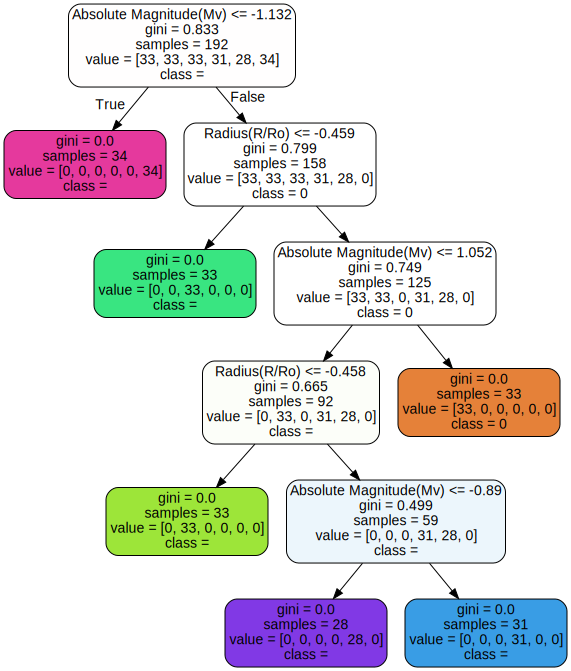

In [248]:
# 결정 트리 학습 결과 시각화
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=X.columns.tolist(),
        class_names=str(y),
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree.dot")

In [249]:
tree_clf.score(X_test, y_test) # 테스트 데이터셋이 따로 있었다면 테스트 데이터셋으로 정확도 확인

0.9791666666666666

In [257]:
tree_clf.predict([[3365, 0.00365, 0.25, 12.25, 6, 5], [8565, 15, 7.3, 5.5, 6, 3]]) # 신규 데이터에 대한 예측

array([0, 0], dtype=int64)

In [258]:
tree_clf.predict_proba([[3365, 0.00365, 0.25, 12.25, 6, 5], [8565, 15, 7.3, 5.5, 6, 3]]) # 신규 데이터에 대한 예측

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [262]:
# 불순도 측정 방법을 엔트로피로 지정하여 학습
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=seed)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=11)

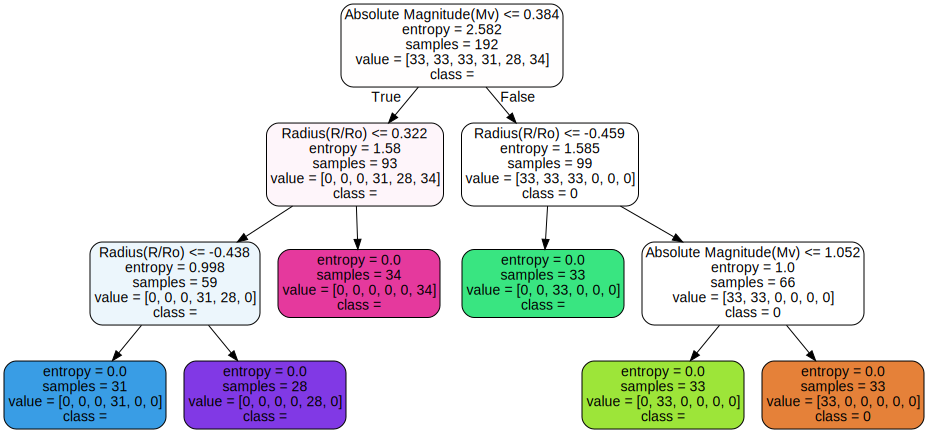

In [263]:
export_graphviz(
        tree_clf,
        out_file="iris_tree_entropy.dot",
        feature_names=X.columns.tolist(),
        class_names=str(y),
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree_entropy.dot")

In [264]:
tree_clf.score(X_test, y_test) # 테스트 데이터셋이 따로 있었다면 테스트 데이터셋으로 정확도 확인

1.0

투표 기반 분류기

In [265]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=seed)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=seed)
svm_clf = SVC(gamma="scale", random_state=seed)

# 강성 투표(hard voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=11)),
                             ('rf', RandomForestClassifier(random_state=11)),
                             ('svc', SVC(random_state=11))])

In [269]:
# 각 분류기의 테스트 집합에 대한 정확도 확인
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_test, y_test))

LogisticRegression 0.9583333333333334
RandomForestClassifier 1.0
SVC 0.9583333333333334
VotingClassifier 0.9583333333333334


In [279]:
# 동일한 작업을 아래와 같이 할 수도 있음
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9583333333333334
RandomForestClassifier 0.9791666666666666
SVC 0.9583333333333334
VotingClassifier 0.9583333333333334


배깅

In [287]:
# 결정 트리 분류기 500개의 배깅 앙상블
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=seed), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=seed)
bag_clf.fit(X_train, y_train)
print(bag_clf.score(X_test, y_test))

0.9791666666666666


In [285]:
# 결정 트리 분류기 하나의 성능
tree_clf = DecisionTreeClassifier(random_state=seed)
tree_clf.fit(X_train, y_train)
print(tree_clf.score(X_test, y_test))

0.9791666666666666


랜덤 포레스트

In [290]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=seed)
rnd_clf.fit(X_train, y_train)
print(rnd_clf.score(X_test, y_test))

0.9791666666666666


AdaBoost

In [276]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5, random_state=seed)
ada_clf.fit(X_train, y_train)
print(ada_clf.score(X_test, y_test))

0.9791666666666666
